In [1]:
from __future__ import print_function, division
#virtualenv -p python3 venv

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import cPickle as pk
import pandas as pd
import numpy as np
from IPython.display import clear_output

In [3]:
import os
import sys
base_module_path = os.path.abspath(os.path.join('..'))
if base_module_path not in sys.path:
    sys.path.append(base_module_path)
import cervix as c

In [4]:
ls ../data/train/

Type_1/ Type_2/ Type_3/


In [5]:
df = c.data.make_base_df()
tdf = c.data.make_test_df(); tdf.head()

,path,num_id
0,../data/test/0.jpg,0
1,../data/test/1.jpg,1
2,../data/test/10.jpg,10
3,../data/test/100.jpg,100
4,../data/test/101.jpg,101


In [ ]:
#df = c.processing.save_grayscale(df)

In [6]:
df.head()

,path,type,filetype,num_id
0,../data/train/Type_1/0.jpg,Type_1,jpg,0
1,../data/train/Type_1/10.jpg,Type_1,jpg,10
2,../data/train/Type_1/1013.jpg,Type_1,jpg,1013
3,../data/train/Type_1/1014.jpg,Type_1,jpg,1014
4,../data/train/Type_1/1019.jpg,Type_1,jpg,1019


In [7]:
df['gray_path'] = c.data.get_img_paths_for('gray', df.num_id)

In [9]:
df.head()

,path,type,filetype,num_id,gray_path
0,../data/train/Type_1/0.jpg,Type_1,jpg,0,../data/gray/0.jpg
1,../data/train/Type_1/10.jpg,Type_1,jpg,10,../data/gray/10.jpg
2,../data/train/Type_1/1013.jpg,Type_1,jpg,1013,../data/gray/1013.jpg
3,../data/train/Type_1/1014.jpg,Type_1,jpg,1014,../data/gray/1014.jpg
4,../data/train/Type_1/1019.jpg,Type_1,jpg,1019,../data/gray/1019.jpg


In [20]:
X, y = c.processing.random_forest_transform(df)
print(X.shape)
print(y.shape)

(1481, 30000)
(1481,)


In [11]:
import scipy

In [12]:
import sklearn

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(992, 30000)
(992,)
(489, 30000)
(489,)


In [14]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(n_jobs=2,n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [23]:
y_test

array(['1', '2', '2', '2', '3', '3', '2', '3', '1', '1', '1', '1', '3',
       '2', '2', '2', '2', '2', '2', '3', '2', '3', '3', '2', '2', '3',
       '3', '3', '2', '2', '2', '1', '2', '2', '2', '3', '1', '2', '2',
       '1', '3', '2', '3', '3', '3', '2', '1', '2', '2', '2', '2', '3',
       '3', '3', '3', '1', '3', '3', '2', '3', '2', '2', '2', '2', '3',
       '2', '2', '3', '2', '2', '3', '2', '2', '3', '1', '2', '1', '2',
       '1', '2', '3', '3', '2', '3', '2', '3', '3', '3', '1', '3', '2',
       '3', '2', '2', '2', '2', '1', '1', '1', '2', '2', '2', '3', '3',
       '3', '3', '3', '2', '3', '3', '1', '2', '3', '2', '2', '2', '2',
       '3', '1', '2', '2', '2', '1', '2', '3', '2', '1', '1', '3', '3',
       '3', '3', '2', '2', '2', '3', '2', '3', '2', '2', '2', '2', '3',
       '1', '3', '3', '1', '2', '2', '2', '1', '2', '3', '2', '2', '1',
       '1', '2', '3', '2', '3', '3', '2', '3', '1', '3', '3', '3', '1',
       '1', '2', '2', '3', '1', '2', '3', '2', '2', '2', '2', '2

In [22]:
preds_probs = rfc.predict_proba(X_test); preds_probs

array([[ 0.14,  0.58,  0.28],
       [ 0.28,  0.5 ,  0.22],
       [ 0.16,  0.66,  0.18],
       ..., 
       [ 0.08,  0.88,  0.04],
       [ 0.16,  0.38,  0.46],
       [ 0.2 ,  0.54,  0.26]])

In [24]:
rfc.score(X_test, y_test)  

0.4887525562372188

In [ ]:
test_df = c.data.make_test_df()
test_df = c.processing.save_grayscale(df)

In [ ]:
score, ldf = cervix.submission.compute_losses('../data/dev_submission.csv')

In [ ]:
score

In [ ]:
ldf

../data/gray/0.jpg
(100, 100)
[[1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 1 1 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]]


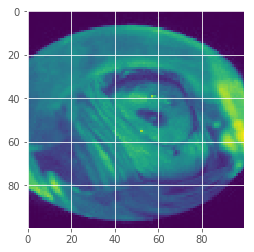

In [18]:
c.data.check_image(df.gray_path[0])

In [ ]:
c.data.check_image(tdf.path[1])